In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\ML\Day11\nutrient.csv", index_col =0)
df.head()

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


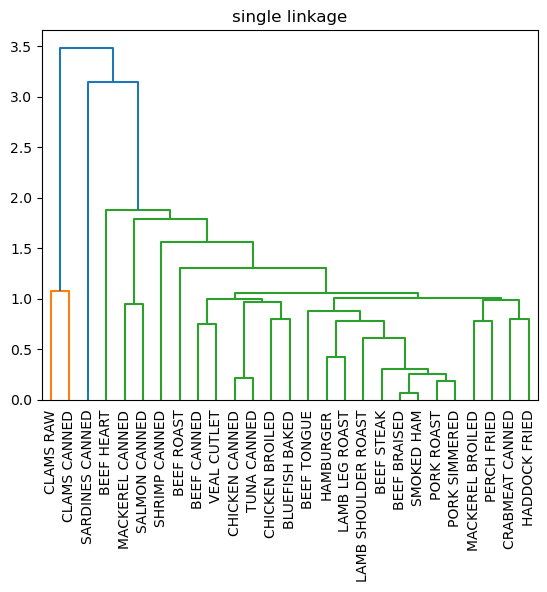

In [3]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(df)
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings,
           labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [4]:
clust = AgglomerativeClustering(n_clusters=3)
clust.fit(df_scaled)

print(clust.labels_)

df_clust = df.copy()
df_clust['Clust'] = clust.labels_
df_clust['Clust'] = df_clust['Clust'].astype(str)

print(silhouette_score(df_scaled, clust.labels_))

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 0 0 0]
0.4037300375344603


In [5]:
Ks = [2,3,4,5]
scores = []
for i in Ks:
    clust = AgglomerativeClustering(n_clusters=i)
    clust.fit(df_scaled)
    scores.append(silhouette_score(df_scaled, clust.labels_))

i_max = np.argmax(scores)
print("Best no. of clusters:", Ks[i_max])
print("Best Score:", scores[i_max])

Best no. of clusters: 4
Best Score: 0.41580070002787306


In [8]:
#pca performed
pca = PCA().set_output(transform='pandas')
principalComponents = pca.fit_transform(df_scaled)
print(pca.explained_variance_ratio_ * 100)

[4.39264687e+01 2.29177954e+01 1.69542689e+01 1.61694340e+01
 3.20329884e-02]


In [10]:
#labels
principalComponents['Clust'] = clust.labels_
principalComponents['Clust'] = principalComponents['Clust'].astype(str)

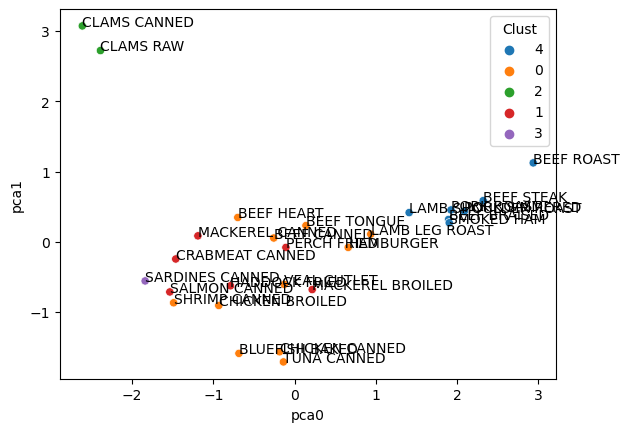

In [11]:
sns.scatterplot(data = principalComponents, x='pca0', y='pca1',
                hue='Clust')
for i in range(0, df.shape[0] ):
    plt.text(principalComponents.values[i,0], 
             principalComponents.values[i,1], 
             list(df.index)[i])
plt.show()